##  Preambule

In [1]:
# #!/usr/bin/env python
# try:
#     get_ipython().magic(u'load_ext autoreload')
#     get_ipython().magic(u'autoreload 2')
#     get_ipython().magic(u'matplotlib qt')
# except:
#     pass

In [2]:
%matplotlib inline

In [3]:
# import logging
# logging.basicConfig(format=
#                           "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
#                     # filename="/tmp/caiman.log",
#                     level=logging.DEBUG)
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
# import caiman as cm
# from caiman.source_extraction import cnmf
# from caiman.utils.utils import download_demo

# from caiman.motion_correction import MotionCorrect
# from caiman.source_extraction.cnmf import params as params
# from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour


In [7]:
path = "/Users/srdjan/Documents/Physio_Ca/data/Experiment1/"

In [8]:
from os import listdir

In [10]:
import pandas as pd

In [29]:
df = pd.DataFrame([pd.read_csv(path+fn,index_col=0).loc[0].append(pd.Series({
    "filename":fn.split(".")[0],
    "ID":int(fn.split("_")[1])
})) for fn in listdir(path) if fn.endswith(".txt")])
df.set_index("ID", inplace=True)
df["Tot_Time"] = df["T"]/df["freq"]
df.sort_index(inplace=True)
df.query("freq>20")

T   X   Y    pxSize pxUnit                  filename       freq  \
ID                                                                        
4   13490  64  64  2.297214     µm   Experiment1_4_Series028  76.104128   
6    6478  64  64  2.297214     µm   Experiment1_6_Series030  76.110458   
7   16644  64  64  2.297214     µm   Experiment1_7_Series032  76.101419   
10  14133  64  64  2.297214     µm  Experiment1_10_Series035  76.096321   
11  17155  64  64  2.297214     µm  Experiment1_11_Series036  76.089174   
22  13256  64  64  2.297214     µm  Experiment1_22_Series051  76.082839   
23   3115  64  64  2.297214     µm  Experiment1_23_Series052  76.081117   

      Tot_Time  
ID              
4   177.257139  
6    85.113139  
7   218.708142  
10  185.725141  
11  225.459144  
22  174.231144  
23   40.943142

In [35]:
import cv2

try:
    cv2.setNumThreads(4)
except:
    pass

In [36]:
%%capture
import caiman as cm

In [40]:
# len(data["time"])

13490

In [95]:
for filename in df.query("freq>20").filename:
    print (filename)
    data = np.load(path+filename+'.npz')
    m_orig = cm.movie(data["data"]).resize(1,1,1./30)
    m_orig.play(fr=500, magnification = 4)

Experiment1_4_Series028
Experiment1_6_Series030
Experiment1_7_Series032
Experiment1_10_Series035
Experiment1_11_Series036
Experiment1_22_Series051
Experiment1_23_Series052


In [65]:
i = 7 #10
filename = df.loc[i,"filename"]
print (filename)
data = np.load(path+filename+'.npz')

Experiment1_7_Series032


In [72]:
allImages = data['data']

In [124]:
m_orig = cm.movie(data["data"]).resize(1,1,1./10)
m_orig.play(fr=500, magnification = 4)

In [73]:
meanImage = allImages.mean(0)

In [79]:
lowestPx = np.where(meanImage==meanImage.min())
lowestPx = np.array(lowestPx).flatten()

In [85]:
pxProfile = allImages[(slice(None),)+tuple(lowestPx)]

In [86]:
from collections import Counter

In [94]:
np.array(list(Counter(pxProfile).values()))

array([12289,  3690,   588,    66,     8,     3])

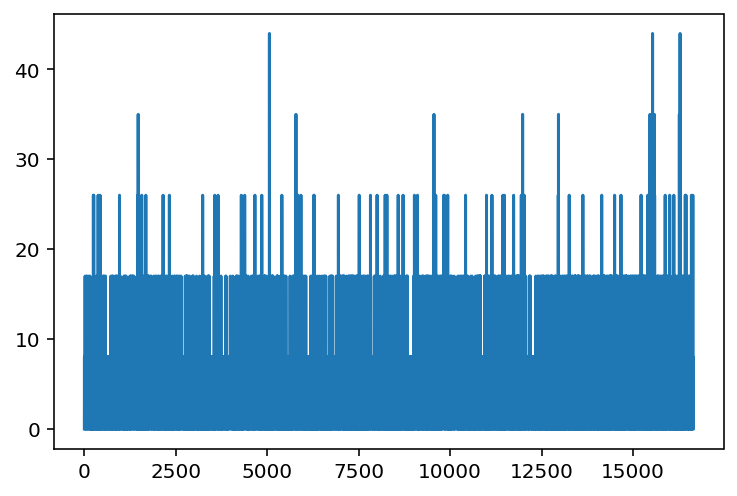

In [84]:
plt.plot()

In [88]:
from sys import path as syspath
syspath.append("/Users/srdjan/Documents/Physio_Ca/functions/")

from physio_def_1 import getApparentFreq, importFrames, getTimes

In [107]:
from physio_def_1 import getApparentFreq, importFrames, getTimes, getRoiProfiles

In [89]:
from itertools import product

In [114]:
from physio_def_1 import addRoisToImage, rebin

In [101]:
addRoisToImage?

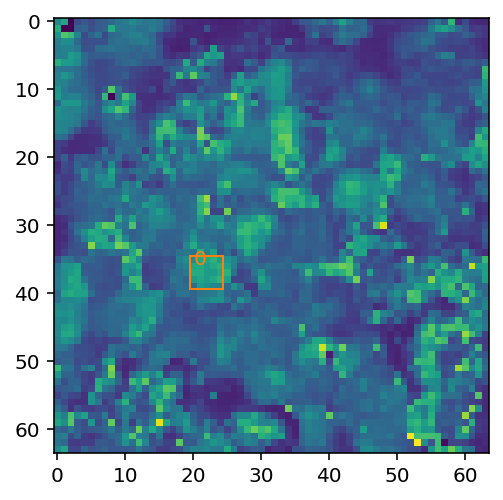

In [106]:
ax = plt.subplot(111)
ax.imshow(allImages.std(0).T)
addRoisToImage(pxShows=[(20,35)],pxWin=5,ax=ax)

In [119]:
profile = getRoiProfiles([(20,35)],5,image_=allImages)[0]

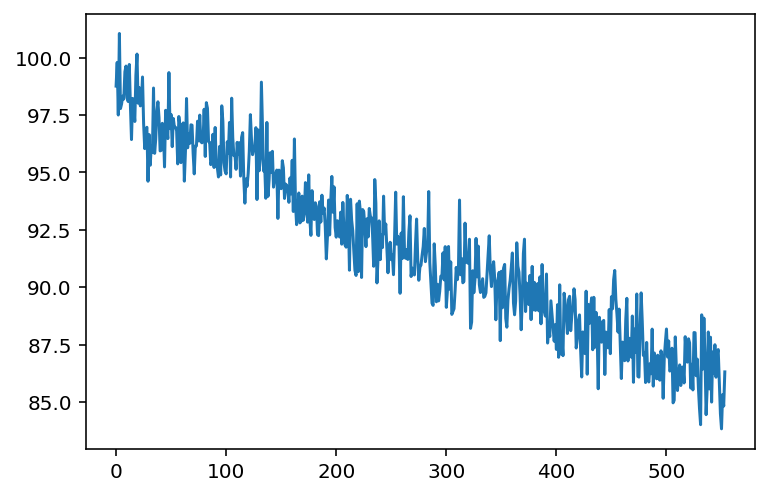

In [120]:
plt.plot(rebin(profile,30))

In [140]:
def mmapSave(fname_, array_, order=None):
    origOrder= "F" if array_.flags.f_contiguous else "C"
    if order is None:
        order=origOrder
    elif order!=origOrder:
        array_ = np.array(array_,order=order)
    fp = np.memmap(fname_, dtype=array_.dtype, mode='w+', shape=array_.shape, order=order)
    fp[:] = array_[:]
    del fp

In [171]:
def mmapSaveMovie(movie_, order=None,fnbase="/Users/srdjan/Documents/Physio_Ca/data/tmp_"):
    origOrder= "F" if movie_.flags.f_contiguous else "C"
    if order is None:
        order=origOrder
    dims = movie_.shape
    fname = fnbase+"d1_%i_d2_%i_d3_1_order_%s_frames_%i_.mmap"%(dims[1], dims[2], order, dims[0])
    mmapSave(fname,movie_.astype(np.float32),order=order)

In [172]:
allImages.shape

(16644, 64, 64)

In [184]:
mmapSaveMovie(allImages,order="F")

In [65]:
# # fname_new = 
# # arrayOrder = "F"
# fname_new = cm.save_memmap(
#     [bluredMovie],
#     base_name="/Users/srdjan/Documents/Physio_Ca/data/dummy",
# #     order=arrayOrder
#               )

In [193]:
from skimage.external import tifffile as tif

In [195]:
tif.imsave?

In [196]:
tif.imsave("/Users/srdjan/Documents/Physio_Ca/data/temp.tiff",allImages)

# Import movie and mmap

In [18]:
from os.path import expanduser

In [19]:
# fname_new = expanduser("~/Documents/Physio_Ca/data/dummy_d1_%i_d2_%i_d3_1_order_%s_frames_1000_.mmap"
# %(origDims[1],origDims[2],arrayOrder))

In [197]:
cm.save_memmap?

In [206]:
# mmapFilename = cm.save_memmap(["/Users/srdjan/Documents/Physio_Ca/data/temp.tiff"])
mmapFilename = cm.save_memmap([allImages])

In [207]:
mmapFilename

'Yr_d1_64_d2_64_d3_1_order_F_frames_16644_.mmap'

In [208]:
 Yr, importDims, importTdim =  cm.load_memmap(mmapFilename)

In [209]:
images = Yr.T.reshape((importTdim,) + importDims, order='F')

In [210]:
importedMovie = cm.movie(images)

In [211]:
images.shape

(16644, 64, 64)

In [212]:
importedMovie[:2000].resize(1,1,1./10).play(fr=100, magnification=4)

In [175]:
type(importedMovie)

tuple

In [21]:
fp = fp.reshape(bluredMovie.shape)

In [ ]:
importMovie = cm.movie(fp.reshape(bluredMovie.shape))

In [79]:
importMovie.play(fr=100, magnification=5)

In [23]:
importMovie.shape == origDims

True

In [24]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=2, single_thread=False)

In [25]:
# dataset dependent parameters
frate = 1      # movie frame rate
decay_time = 2 # length of a typical transient in seconds

In [26]:
cn_filter, pnr = cm.summary_images.correlation_pnr(importMovie,
                                                   swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile

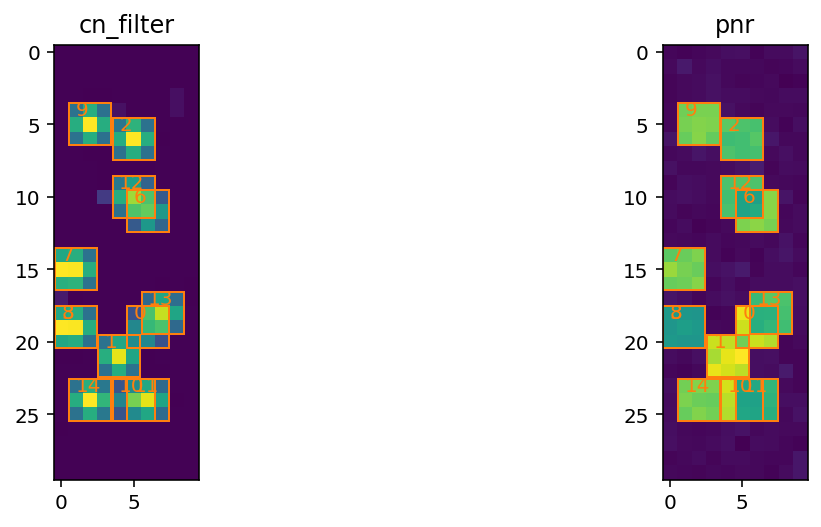

In [27]:
plt.close()
fig, axs = plt.subplots(1,2,figsize=(10,4))
for ax,title in zip(axs,["cn_filter","pnr"]):
    ax.set_title(title)
    ax.imshow(eval(title).T)
    addRoisToImage({i:roiOrigins[i] for i in range(Nrois) if rawsignal[i].sum()>0},roiWidth,ax=ax)

In [28]:
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr

In [29]:
# import bokeh.plotting as bpl
# bpl.output_notebook()
# import holoviews as hv
# hv.notebook_extension('bokeh')

In [30]:
# nb_inspect_correlation_pnr(cn_filter, pnr)

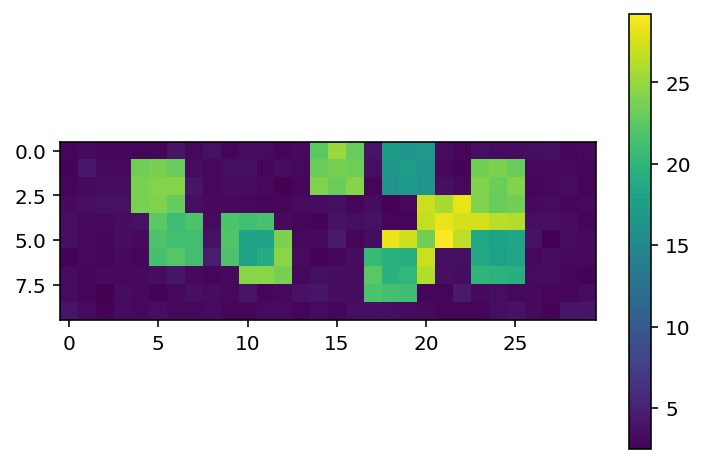

In [31]:
plt.imshow(pnr)
plt.colorbar()

In [32]:
min_corr = .2
min_pnr  = 10

In [33]:
from caiman.source_extraction import cnmf

In [78]:
# n_processes, k=5, gSig=[4, 4], gSiz=None, merge_thresh=0.8, p=2, dview=None,
#                  Ain=None, Cin=None, b_in=None, f_in=None, do_merge=True,
#                  ssub=2, tsub=2, p_ssub=1, p_tsub=1, method_init='greedy_roi', alpha_snmf=100,
#                  rf=None, stride=None, memory_fact=1, gnb=1, nb_patch=1, only_init_patch=False,
#                  method_deconvolution='oasis', n_pixels_per_process=4000, block_size_temp=5000, num_blocks_per_run_temp=20,
#                  block_size_spat=5000, num_blocks_per_run_spat=20,
#                  check_nan=True, skip_refinement=False, normalize_init=True, options_local_NMF=None,
#                  minibatch_shape=100, minibatch_suff_stat=3,
#                  update_num_comps=True, rval_thr=0.9, thresh_fitness_delta=-20,
#                  thresh_fitness_raw=None, thresh_overlap=.5,
#                  max_comp_update_shape=np.inf, num_times_comp_updated=np.inf,
#                  batch_update_suff_stat=False, s_min=None,
#                  remove_very_bad_comps=False, border_pix=0, low_rank_background=True,
#                  update_background_components=True, rolling_sum=True, rolling_length=100,
#                  min_corr=.85, min_pnr=20, ring_size_factor=1.5,
#                  center_psf=False, use_dense=True, deconv_flag=True,
#                  simultaneously=False, n_refit=0, del_duplicates=False, N_samples_exceptionality=None,
#                  max_num_added=3, min_num_trial=2, thresh_CNN_noisy=0.5,
#                  fr=30, decay_time=0.4, min_SNR=2.5, ssub_B=2, init_iter=2,
#                  sniper_mode=False, use_peak_max=False, test_both=False,
#                  expected_comps=500, max_merge_area=None, params=None):
#         """
#         Constructor of the CNMF method
#         Args:
#             n_processes: int
#                number of processed used (if in parallel this controls memory usage)
#             k: int
#                number of neurons expected per FOV (or per patch if patches_pars is  None)
#             gSig: tuple
#                 expected half size of neurons
#             merge_thresh: float
#                 merging threshold, max correlation allowed
#             dview: Direct View object
#                 for parallelization purposes when using ipyparallel
#             p: int
#                 order of the autoregressive process used to estimate deconvolution
#             Ain: ndarray
#                 if know, it is the initial estimate of spatial filters
#             ssub: int
#                 downsampleing factor in space
#             tsub: int
#                  downsampling factor in time
#             p_ssub: int
#                 downsampling factor in space for patches
#             method_init: str
#                can be greedy_roi or sparse_nmf
#             alpha_snmf: float
#                 weight of the sparsity regularization
#             p_tsub: int
#                  downsampling factor in time for patches
#             rf: int
#                 half-size of the patches in pixels. rf=25, patches are 50x50
#             gnb: int
#                 number of global background components
#             nb_patch: int
#                 number of background components per patch
#             stride: int
#                 amount of overlap between the patches in pixels
#             memory_fact: float
#                 unitless number accounting how much memory should be used. You will
#                  need to try different values to see which one would work the default is OK for a 16 GB system
#             N_samples_fitness: int
#                 number of samples over which exceptional events are computed (See utilities.evaluate_components)
#             only_init_patch= boolean
#                 only run initialization on patches
#             method_deconvolution = 'oasis' or 'cvxpy'
#                 method used for deconvolution. Suggested 'oasis' see
#                 Friedrich J, Zhou P, Paninski L. Fast Online Deconvolution of Calcium Imaging Data.
#                 PLoS Comput Biol. 2017; 13(3):e1005423.
#             n_pixels_per_process: int.
#                 Number of pixels to be processed in parallel per core (no patch mode). Decrease if memory problems
#             block_size: int.
#                 Number of pixels to be used to perform residual computation in blocks. Decrease if memory problems
#             num_blocks_per_run_spat: int
#                 In case of memory problems you can reduce this numbers, controlling the number of blocks processed in parallel during residual computing
#             num_blocks_per_run_temp: int
#                 In case of memory problems you can reduce this numbers, controlling the number of blocks processed in parallel during residual computing
#             check_nan: Boolean.
#                 Check if file contains NaNs (costly for very large files so could be turned off)
#             skip_refinement:
#                 Bool. If true it only performs one iteration of update spatial update temporal instead of two
#             normalize_init=Bool.
#                 Differences in intensities on the FOV might caus troubles in the initialization when patches are not used,
#                  so each pixels can be normalized by its median intensity
#             options_local_NMF:
#                 experimental, not to be used
#             remove_very_bad_comps:Bool
#                 whether to remove components with very low values of component quality directly on the patch.
#                  This might create some minor imprecisions.
#                 However benefits can be considerable if done because if many components (>2000) are created
#                 and joined together, operation that causes a bottleneck
#             border_pix:int
#                 number of pixels to not consider in the borders
#             low_rank_background:bool
#                 if True the background is approximated with gnb components. If false every patch keeps its background (overlaps are randomly assigned to one spatial component only)
#                  In the False case all the nonzero elements of the background components are updated using hals (to be used with one background per patch)
#             update_background_components:bool
#                 whether to update the background components during the spatial phase
#             min_corr: float
#                 minimal correlation peak for 1-photon imaging initialization
#             min_pnr: float
#                 minimal peak  to noise ratio for 1-photon imaging initialization
#             ring_size_factor: float
#                 it's the ratio between the ring radius and neuron diameters.
#                     max_comp_update_shape:
#                              threshold number of components after which selective updating starts (using the parameter num_times_comp_updated)
#                 num_times_comp_updated:
#                 number of times each component is updated. In inf components are updated at every initbatch time steps
#             expected_comps: int
#                 number of expected components (try to exceed the expected)
#             deconv_flag : bool, optional
#                 If True, deconvolution is also performed using OASIS
#             simultaneously : bool, optional
#                 If true, demix and denoise/deconvolve simultaneously. Slower but can be more accurate.
#             n_refit : int, optional
#                 Number of pools (cf. oasis.pyx) prior to the last one that are refitted when
#                 simultaneously demixing and denoising/deconvolving.
#             N_samples_exceptionality : int, optional
#                 Number of consecutives intervals to be considered when testing new neuron candidates
#             del_duplicates: bool
#                 whether to delete the duplicated created in initialization
#             max_num_added : int, optional
#                 maximum number of components to be added at each step in OnACID
#             min_num_trial : int, optional
#                 minimum numbers of attempts to include a new components in OnACID
#             thresh_CNN_noisy: float
#                 threshold on the per patch CNN classifier for online algorithm
#             ssub_B: int, optional
#                 downsampleing factor for 1-photon imaging background computation
#             init_iter: int, optional
#                 number of iterations for 1-photon imaging initialization
#             max_merge_area: int, optional
#                 maximum area (in pixels) of merged components, used to determine whether to merge components during fitting process

In [76]:
%%capture
opts = cnmf.params.CNMFParams()
# # parameters for source extraction and deconvolution
opts.change_params(params_dict=dict(
method_init = 'corr_pnr',    # use this for 1 photon
p = 1,                       # order of the autoregressive system
K = None,                    # upper bound on number of components per patch, in general None
gSig = (1, 1),               # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (5, 5),               # average diameter of a neuron, in general 4*gSig+1
# # Ain = None,                # possibility to seed with predetermined binary masks
# merge_thr = .7,              # merging threshold, max correlation allowed
rf = 2,                      # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 1,             # amount of overlap between the patches in pixels
#                              (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 1,                    # downsampling factor in time for initialization,
#                              increase if you have memory problems
ssub = 1,                    # downsampling factor in space for initialization,
#                              increase if you have memory problems
#                              you can pass them here as boolean vectors
low_rank_background = None,  # None leaves background of each patch intact,
#                              True performs global low-rank approximation if gnb>0
gnb = 0,                     # number of background components (rank) if positive,
#                              else exact ring model with following settings
#                                 gnb= 0: Return background as b and W
#                                 gnb=-1: Return full rank background B
#                                 gnb<-1: Don't return background
nb_patch = 0,                # number of background components (rank) per patch if gnb>0,
#                              else it is set automatically
min_corr = min_corr,         # min peak value from correlation image
min_pnr = min_pnr,           # min peak to noise ration from PNR image
ssub_B = 1,                  # additional downsampling factor in space for background
ring_size_factor = 1.4,      # radius of ring is gSiz*ring_size_factor
# only_init = True,            # set it to True to run CNMF-E
normalize_init = False,      # just leave as is
center_psf = True,           # leave as is for 1 photon
del_duplicates = True,       # whether to remove duplicates from initialization
border_pix = 0,              # number of pixels to not consider in the borders)
method_deconvolution='oasis',# could use 'cvxpy' alternatively
sn=backgroundNoiseScale,
))

In [77]:
cnm = cnmf.CNMF(n_processes=n_processes, dview=dview,
                min_corr=min_corr,
                min_pnr=min_pnr,
                params=opts,
#                 n_pixels_per_process=1000
               )
cnm.initialize(fp)

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

In [65]:
opts.get('init', 'method_init')

'greedy_roi'

In [64]:
cnm.fit(fp)

ValueError: operands could not be broadcast together with shapes (1000,31) (30,31) 

In [91]:
min_SNR = 3            # adaptive way to set threshold on the transient size
r_values_min = 0.0    # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnm.estimates.evaluate_components(bluredMovie, cnm.params, dview=dview)

/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/past/utils/__init__.py:95: RuntimeWarning: invalid value encountered in true_divide
  return a / b


ValueError: cannot reshape array of size 35100 into shape (200,5,30)

In [92]:
bluredMovie.shape

(1000, 30, 30)

In [74]:
print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

ValueError: cannot reshape array of size 5850 into shape (200,5,5)

In [69]:
cnm.estimates.idx_components

In [6]:
cnm = cnmf.cnmf.load_CNMF(
    "/Users/srdjan/Documents/Physio_Ca/data/Experiment28_Series041_rig__d1_512_d2_512_d3_1_order_F_frames_8000_.hdf5"
)

/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:479: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if isinstance(item.value, str):
/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:486: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if type(item.value) == np.ndarray:
/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:487: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = tuple(item.value)
/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:480: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if item.value == 'NoneType':
/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:491: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] i

### Select file(s) to be processed
The `download_demo` function will download the specific file for you and return the complete path to the file which will be stored in your `caiman_data` directory. If you adapt this demo for your data make sure to pass the complete path to your file(s). Remember to pass the `fnames` variable as a list. Note that the memory requirement of the CNMF-E algorithm are much higher compared to the standard CNMF algorithm. Test the limits of your system before trying to process very large amounts of data.

In [1]:
# from sys import path as syspath
# syspath.append("/Users/srdjan/Documents/Physio_Ca/functions/")

In [2]:
# from physio_def_1 import rebin

In [3]:
# fnames = ['data_endoscope.tif']  # filename to be processed
# fnames = [download_demo(fnames[0])]
# fnames = ["/Users/srdjan/Documents/Physio_Ca/data/Experiment28_Series041.tif"]

In [4]:
# m_orig = cm.load(fnames)

#### Debleaching

In [5]:
# %%capture bla
# m_orig.resize(1,1,1./10).play(fr=100,)

In [6]:
# # %%capture bla
# m_orig.debleach()

In [7]:
# plt.plot(debleached.mean(axis=(1,2)))
# plt.plot(m_orig.mean(axis=(1,2)))

### Setup a cluster
To enable parallel processing a (local) cluster needs to be set up. This is done with a cell below. The variable `backend` determines the type of cluster used. The default value `'local'` uses the multiprocessing package. The `ipyparallel` option is also available. More information on these choices can be found [here](https://github.com/flatironinstitute/CaImAn/blob/master/CLUSTER.md). The resulting variable `dview` expresses the cluster option. If you use `dview=dview` in the downstream analysis then parallel processing will be used. If you use `dview=None` then no parallel processing will be employed.

In [9]:
# #%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
# if 'dview' in locals():
#     cm.stop_server(dview=dview)
# c, dview, n_processes = cm.cluster.setup_cluster(
#     backend='local', n_processes=None, single_thread=False)

In [10]:
# 1./np.diff(m_orig.time).mean()

In [ ]:
cnmf.

### Setup some parameters
We first set some parameters related to the data and motion correction and create a `params` object. We'll modify this object with additional settings later on. You can also set all the parameters at once as demonstrated in the `demo_pipeline.ipynb` notebook.

In [55]:
# dataset dependent parameters
frate = 2                      # movie frame rate
decay_time = 2                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

opts = params.CNMFParams(params_dict=mc_dict)

     9141608 [params.py:                 set():858] [5284] Changing key fnames in group data from None to ['/Users/srdjan/Documents/Physio_Ca/data/Experiment28_Series041.tif']
     9141609 [params.py:                 set():858] [5284] Changing key fr in group data from 30 to 2
     9141610 [params.py:                 set():858] [5284] Changing key decay_time in group data from 0.4 to 2
     9141611 [params.py:                 set():858] [5284] Changing key max_shifts in group motion from (6, 6) to (5, 5)
     9141612 [params.py:                 set():858] [5284] Changing key gSig_filt in group motion from None to (3, 3)
     9141612 [params.py:                 set():858] [5284] Changing key strides in group motion from (96, 96) to (48, 48)
     9141613 [params.py:                 set():858] [5284] Changing key overlaps in group motion from (32, 32) to (24, 24)


### Motion Correction
The background signal in micro-endoscopic data is very strong and makes the motion correction challenging. 
As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the background and enhance spatial landmarks. 
The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no spatial filtering is performed (default option, used in 2p data).
After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data so no information is lost.

The motion corrected files are saved in memory mapped format. If no motion correction is being performed, then the file gets directly memory mapped.

In [57]:
if motion_correct:
    # do motion correction rigid
    mc = MotionCorrect(fnames, dview=dview, **opts.get_group('motion'))
    mc.motion_correct(save_movie=True)
    fname_mc = mc.fname_tot_els if pw_rigid else mc.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                     np.max(np.abs(mc.y_shifts_els)))).astype(np.int)
    else:
        bord_px = np.ceil(np.max(np.abs(mc.shifts_rig))).astype(np.int)
        plt.subplot(1, 2, 1); plt.imshow(mc.total_template_rig)  # % plot template
        plt.subplot(1, 2, 2); plt.plot(mc.shifts_rig)  # % plot rigid shifts
        plt.legend(['x shifts', 'y shifts'])
        plt.xlabel('frames')
        plt.ylabel('pixels')

    bord_px = 0 if border_nan is 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(fnames, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

     9211450 [motion_correction.py:motion_correct_rigid():275] [5284] Entering Rigid Motion Correction
     9211451 [motion_correction.py:motion_correct_rigid():276] [5284] 9.474121
     9219216 [movies.py:      extract_shifts():346] [5284] min_val in extract_shifts: -2.9413434338569644
     9219217 [movies.py:      extract_shifts():348] [5284] Movie average is negative. Removing 1st percentile.
     9219416 [movies.py:      extract_shifts():366] [5284] Movie average is negative. Removing 1st percentile.
     9220518 [movies.py:      extract_shifts():378] [5284] Frame 100
     9221624 [movies.py:      extract_shifts():378] [5284] Frame 200
     9222636 [movies.py:        apply_shifts():445] [5284] cubic interpolation
     9223507 [movies.py:        apply_shifts():478] [5284] Frame 100
     9224384 [movies.py:        apply_shifts():478] [5284] Frame 200
     9227596 [movies.py:      extract_shifts():346] [5284] min_val in extract_shifts: -2.9413434338569644
     9227597 [movies.py:     

### Load memory mapped file

In [58]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

In [60]:
images.shape

(8000, 512, 512)

In [61]:
m_orig.shape

(8000, 512, 512)

In [65]:
fnames

['/Users/srdjan/Documents/Physio_Ca/data/Experiment28_Series041.tif']

In [64]:
fname_new

'/Users/srdjan/Documents/Physio_Ca/data/memmap__d1_512_d2_512_d3_1_order_C_frames_8000_.mmap'

In [66]:
m_demoved = cm.movie(images)

In [80]:
downsample_ratio = 1./10
ix = (slice(None),slice(100,150),slice(100,150))
cm.concatenate([
    m_orig   [ix].resize(1, 1, downsample_ratio) - mc.min_mov*mc.nonneg_movie,
    m_demoved[ix].resize(1, 1, downsample_ratio), 
], axis=2).play(fr=60, q_max=99.5, magnification=4, 
                do_loop=True)

    52240444 [movies.py:              resize():976] [5284] reshaping along z
    52261705 [movies.py:              resize():976] [5284] reshaping along z


Text(0, 0.5, 'pixels')

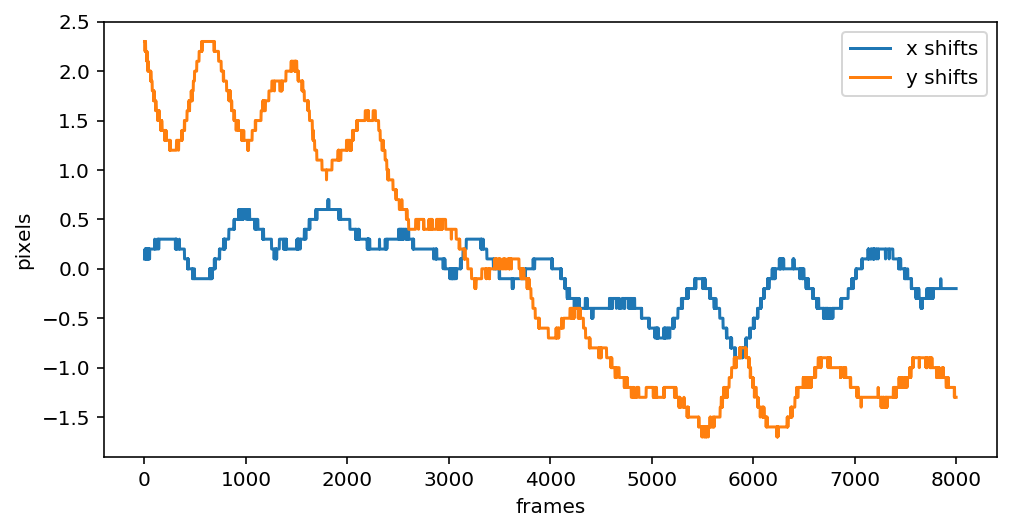

In [202]:
#%% plot rigid shifts

plt.figure(figsize = (8,4))
plt.plot(mc.shifts_rig)
plt.legend(['x shifts','y shifts'])
plt.xlabel('frames')
plt.ylabel('pixels')

### Parameter setting for CNMF-E
We now define some parameters for the source extraction step using the CNMF-E algorithm. 
We construct a new dictionary and use this to modify the *existing* `params` object,

In [82]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (3, 3)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (13, 13)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = .8       # min peak value from correlation image
min_pnr = 10        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

opts.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # leave as is for 1 photon
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px})                # number of pixels to not consider in the borders)

    52362396 [params.py:                 set():858] [5284] Changing key rf in group patch from None to 40
    52362397 [params.py:                 set():858] [5284] Changing key stride in group patch from None to 20
    52362398 [params.py:                 set():858] [5284] Changing key nb_patch in group patch from 1 to 0
    52362399 [params.py:                 set():858] [5284] Changing key low_rank_background in group patch from True to None
    52362399 [params.py:                 set():858] [5284] Changing key del_duplicates in group patch from False to True
    52362400 [params.py:                 set():858] [5284] Changing key p in group preprocess from 2 to 1
    52362401 [params.py:                 set():858] [5284] Changing key method_init in group init from greedy_roi to corr_pnr
    52362401 [params.py:                 set():858] [5284] Changing key K in group init from 30 to None
    52362402 [params.py:                 set():858] [5284] Changing key gSig in group init fro

CNMFParams:

data:

{'caiman_version': '1.6.3',
 'decay_time': 2,
 'dims': (512, 512),
 'dxy': (1, 1),
 'fnames': ['/Users/srdjan/Documents/Physio_Ca/data/Experiment28_Series041.tif'],
 'fr': 2,
 'last_commit': 'FILE-1571404903',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8),
 'ss': array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8),
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 

### Inspect summary images and set parameters
Check the optimal values of `min_corr` and `min_pnr` by moving slider in the figure that pops up. You can modify them in the `params` object. 
Note that computing the correlation pnr image can be computationally and memory demanding for large datasets. In this case you can compute
only on a subset of the data (the results will not change). You can do that by changing `images[::1]` to `images[::5]` or something similar.
This will compute the correlation pnr image

In [23]:
dct = cnm.params.to_dict()

In [26]:
import pandas as pd

In [32]:
cnm.params.get(group="init_params",key="gSig")

KeyError: 'No group in CNMFParams named init_params'

In [29]:
for k in dct.keys():
    print (k,"-----------")
    print(pd.Series(dct[k]))
#     break

data -----------
caiman_version                                    1.6.3
decay_time                                            2
dims                                         (512, 512)
dxy                                              (1, 1)
fnames            [b'/Users/srdjan/Documents/Physio_C']
fr                                                    2
last_commit                             FILE-1571404903
mmap_C                                             None
mmap_F                                             None
var_name_hdf5                                       mov
dtype: object
spatial_params -----------
block_size_spat                                                              5000
dist                                                                            3
expandCore                      [[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1...
extract_cc                                                                   True
maxthr                                                

In [83]:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(images[::1], gSig=gSig[0], swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
nb_inspect_correlation_pnr(cn_filter, pnr)

:Layout
   .AdjointLayout.Correlation :AdjointLayout
      :Image   [x,y]   (corr)
      :DynamicMap   []
         :Histogram   [corr]   (corr_frequency)
   .AdjointLayout.Pnr         :AdjointLayout
      :Image   [x,y]   (pnr)
      :DynamicMap   []
         :Histogram   [pnr]   (pnr_frequency)

You can inspect the correlation and PNR images to select the threshold values for `min_corr` and `min_pnr`. The algorithm will look for components only in places where these value are above the specified thresholds. You can adjust the dynamic range in the plots shown above by choosing the selection tool (third button from the left) and selecting the desired region in the histogram plots on the right of each panel.

In [84]:
# print parameters set above, modify them if necessary based on summary images
print(min_corr) # min correlation of peak (from correlation image)
print(min_pnr)  # min peak to noise ratio

0.8
10


### Run the CNMF-E algorithm

In [85]:
cnm = cnmf.CNMF(n_processes=n_processes, dview=dview, Ain=Ain, params=opts)
cnm.fit(images)

    55195261 [params.py:                 set():858] [5284] Changing key n_processes in group patch from 1 to 8
    55195263 [params.py:                 set():858] [5284] Changing key init_batch in group online from 200 to 8000
    55195264 [cnmf.py:                 fit():468] [5284] (8000, 512, 512)
    55195264 [params.py:                 set():858] [5284] Changing key medw in group spatial from None to (3, 3)
    55195266 [cnmf.py:                 fit():485] [5284] Using 8 processes
    55195270 [params.py:                 set():858] [5284] Changing key n_pixels_per_process in group preprocess from None to 6510
    55195271 [params.py:                 set():858] [5284] Changing key n_pixels_per_process in group spatial from None to 6510
    55195271 [cnmf.py:                 fit():496] [5284] using 6510 pixels per process
    55195272 [cnmf.py:                 fit():497] [5284] using 5000 block_size_spat
    55195273 [cnmf.py:                 fit():498] [5284] using 5000 block_size_t

In [211]:
cnm.save(fname_mc[0].replace(".mmap",".hdf5"))
# ("")

/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:441: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if not np.array_equal(h5file[path + key].value, item):
/Users/srdjan/anaconda2/envs/caiman/lib/python3.7/site-packages/caiman/utils/utils.py:432: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if not h5file[path + key].value == item:
    63128179 [utils.py:recursively_save_dict_contents_to_group():447] [5284] A is sparse ****
    63130758 [utils.py:recursively_save_dict_contents_to_group():447] [5284] W is sparse ****
    63131493 [utils.py:recursively_save_dict_contents_to_group():414] [5284] g is an object type
    63131509 [utils.py:recursively_save_dict_contents_to_group():422] [5284] ['groups', 'idx_tot', 'ind_A', 'Ab_epoch', 'coordinates', 'loaded_model', 'optional_outputs', 'merged_ROIs', '** not saved']
    63131510 [utils.py:recursively_save_dict_contents_to_group(

### Alternate way to run the pipeline at once
It is possible to run the combined steps of motion correction, memory mapping, and cnmf fitting in one step as shown below. The command is commented out since the analysis has already been performed. It is recommended that you familiriaze yourself with the various steps and the results of the various steps before using it.

In [86]:
# cnm1 = cnmf.CNMF(n_processes, params=opts, dview=dview)
# cnm1.fit_file(motion_correct=motion_correct)

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

<img src="../../docs/img/evaluationcomponent.png"/>
After setting some parameters we again modify the existing `params` object.

In [87]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

min_SNR = 3            # adaptive way to set threshold on the transient size
r_values_min = 0.85    # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

    57175298 [params.py:                 set():858] [5284] Changing key min_SNR in group quality from 2.5 to 3
    57175300 [params.py:                 set():858] [5284] Changing key rval_thr in group quality from 0.8 to 0.85
    57175301 [params.py:                 set():858] [5284] Changing key use_cnn in group quality from True to False
    57175488 [components_evaluation.py:estimate_components_quality():696] [5284] Component evaluation in parallel


 ***** 
Number of total components:  1845
Number of accepted components:  1680


### Do some plotting

In [10]:
#%% plot contour plots of accepted and rejected components
cnm.estimates.plot_contours_nb(img=cn_filter, idx=cnm.estimates.idx_components)

NameError: name 'cn_filter' is not defined

View traces of accepted and rejected components. Note that if you get data rate error you can start Jupyter notebooks using:
'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10'

In [92]:
len(cnm.estimates.coordinates)

1845

In [97]:
plt.imshow(cn_filter)

In [122]:
cnm.estimates.SNR_comp.shape

(1845,)

In [144]:
maxDims = []
for coords in cnm.estimates.coordinates:
    maxDims += [np.max(np.nanmax(coords["coordinates"][1:-1],axis=0)-
                       np.nanmin(coords["coordinates"][1:-1],axis=0))]

In [147]:
maxDims = np.array(maxDims)

In [191]:
%matplotlib inline

    62156446 [pyplot.py:      switch_backend():225] [5284] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [192]:
%config InlineBackend.figure_format = 'retina'

    62233425 [ticker.py:         tick_values():2300] [5284] vmin 0.6865942807383837 vmax 2687.176476354904
    62233426 [ticker.py:         tick_values():2351] [5284] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
    62233436 [ticker.py:         tick_values():2300] [5284] vmin 0.6865942807383837 vmax 2687.176476354904
    62233437 [ticker.py:         tick_values():2351] [5284] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
    62233440 [ticker.py:         tick_values():2300] [5284] vmin 0.6865942807383837 vmax 2687.176476354904
    62233441 [ticker.py:         tick_values():2351] [5284] ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+0

    62233898 [ticker.py:         tick_values():2351] [5284] ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05])
    62233918 [ticker.py:         tick_values():2300] [5284] vmin 0.6865942807383837 vmax 2687.176476354904
    62233920 [ticker.py:         tick_values():2351] [5284] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
    62233923 [ticker.py:         tick_values():2300] [5284] vmin 0.6865942807383837 vmax 2687.176476354904
    622

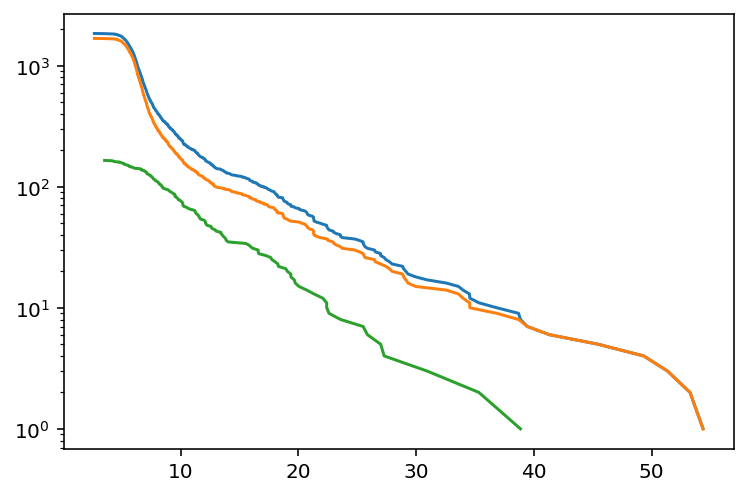

In [197]:
# %%capture
ax = plt.subplot(111)
for x in [maxDims,maxDims[cnm.estimates.idx_components],maxDims[cnm.estimates.idx_components_bad]]:
#     ax.plot(sorted(x),np.linspace(0,1,len(x)+1)[1:][::-1])
    ax.plot(sorted(x),np.arange(1,len(x)+1)[::-1])
ax.set_yscale("log")
#     ax.hist(x,np.linspace(0,50,101), histtype="step")

In [198]:
idInteresting = np.argsort(-maxDims)[0]

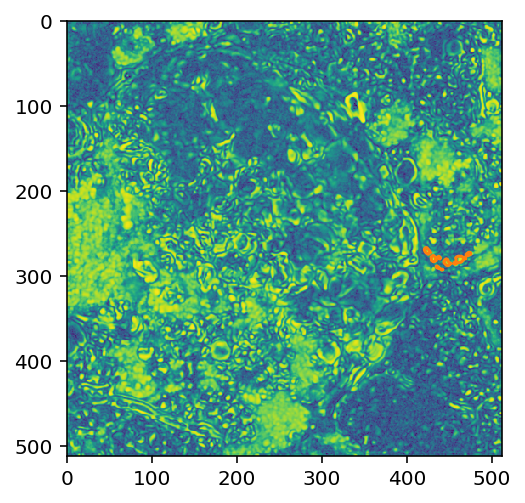

In [199]:
x,y = cnm.estimates.coordinates[idInteresting]["coordinates"].T

plt.imshow(cn_filter)
plt.plot([])
plt.plot(x-.5,y-.5)


In [159]:
# cnm.estimates.hv_view_components()

In [200]:
cnm.estimates.hv_view_components??

In [201]:
cm.utils.visualization.hv_view_patches??

In [172]:
# strange components
cnm.estimates.hv_view_components(
    img=cn_filter,
    idx=np.argsort(-maxDims)[:10],
    denoised_color='red', cmap='gray')

:DynamicMap   [unit_id,scale]
   :Layout
      .HSV.I     :HSV   [height,width]   (H,S,V)
      .Overlay.I :Overlay
         .Curve.I  :Curve   [frame #]   (y)
         .Curve.II :Curve   [frame #]   (y)

In [11]:
# accepted components
cnm.estimates.hv_view_components(img=cn_filter, idx=cnm.estimates.idx_components,
                                denoised_color='red', cmap='gray')

NameError: name 'cnm' is not defined

In [164]:
# # rejected components
# cnm.estimates.hv_view_components(img=cn_filter, idx=cnm.estimates.idx_components_bad,
#                                 denoised_color='red', cmap='gray')

### Stop cluster

In [ ]:
cm.stop_server(dview=dview)

### Some instructive movies
Play the reconstructed movie alongside the original movie and the (amplified) residual

In [ ]:
# with background 
cnm.estimates.play_movie(images, q_max=99.5, magnification=2,
                                 include_bck=True, gain_res=10, bpx=bord_px)

In [ ]:
# without background
cnm.estimates.play_movie(images, q_max=99.9, magnification=2,
                                 include_bck=False, gain_res=4, bpx=bord_px)